In [2]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from sys import stdout

from helpers import *

In [3]:
ROOT_FOLDER = "../"
DATA_FOLDER = "data/processed/"

INPUT_LAB_SPEC = ROOT_FOLDER + DATA_FOLDER + "data_lab_spec_clean.csv"
INPUT_LAB_CONC = ROOT_FOLDER + DATA_FOLDER + "data_lab_conc_clean.csv"

INPUT_AMB_SPEC = ROOT_FOLDER + DATA_FOLDER + "data_amb_spec_clean.csv"
INPUT_AMB_CONC = ROOT_FOLDER + DATA_FOLDER + "data_amb_conc_clean.csv"

In [4]:
# Import data

file_lab_spec = pd.read_csv(INPUT_LAB_SPEC, index_col="Unnamed: 0")
file_lab_conc = pd.read_csv(INPUT_LAB_CONC, index_col="Unnamed: 0")

file_amb_spec = pd.read_csv(INPUT_AMB_SPEC, index_col="Unnamed: 0")
file_amb_conc = pd.read_csv(INPUT_AMB_CONC, index_col="Unnamed: 0")

data_lab_spec = pd.DataFrame(file_lab_spec)
data_lab_conc = pd.DataFrame(file_lab_conc)

data_amb_spec = pd.DataFrame(file_amb_spec)
data_amb_conc = pd.DataFrame(file_amb_conc)

In [5]:
sites_spec = pd.DataFrame(data_lab_spec.columns, columns = ['Sites'])
sites_spec = sites_spec.drop(sites_spec.index[[0]]).reset_index(drop=True)

sites_conc_train = data_lab_conc[['Sites']].loc[data_lab_conc['TRset'] == 'calibration'].reset_index(drop=True)
sites_conc_test = data_lab_conc[['Sites']].loc[data_lab_conc['TRset'] == 'test'].reset_index(drop=True)

sites_both_train = pd.merge(sites_conc_train, sites_spec, how='inner').values.ravel()
sites_both_test = pd.merge(sites_conc_test, sites_spec, how='inner').values.ravel()

data_lab_spec_train = data_lab_spec[sites_both_train]
data_lab_spec_test = data_lab_spec[sites_both_test]

data_lab_conc_train = data_lab_conc[['Sites', '(NH4)SO4']].loc[data_lab_conc['Sites'].isin(sites_both_train)]
data_lab_conc_test = data_lab_conc[['Sites', '(NH4)SO4']].loc[data_lab_conc['Sites'].isin(sites_both_test)]

In [6]:
# Distribution function

# Frequency
stats_train = data_lab_conc_train.groupby('(NH4)SO4')['(NH4)SO4'].agg('count') \
                        .pipe(pd.DataFrame) \
                        .rename(columns = {'(NH4)SO4':'frequency'})\
                        .reset_index()

# PDF
stats_train['pdf'] = stats_train['frequency']/sum(stats_train['frequency'])

stats_train = stats_train.drop(stats_train.index[0])

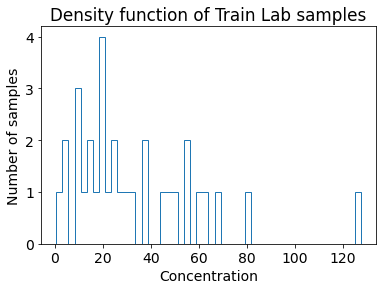

In [7]:
plt.hist(stats_train['(NH4)SO4'], bins=50, histtype='step')
plt.title('Density function of Train Lab samples')
plt.ylabel('Number of samples')
plt.xlabel('Concentration')
plt.show()

In [8]:
# Distribution function

# Frequency
stats_test = data_lab_conc_test.groupby('(NH4)SO4')['(NH4)SO4'].agg('count') \
                        .pipe(pd.DataFrame) \
                        .rename(columns = {'(NH4)SO4':'frequency'})\
                        .reset_index()

# PDF
stats_test['pdf'] = stats_test['frequency']/sum(stats_test['frequency'])

stats_test = stats_test.drop(stats_test.index[0])

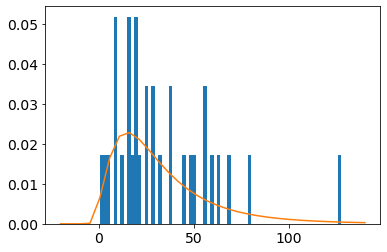

In [9]:
from scipy import stats

plt.hist(stats_train['(NH4)SO4'], bins=70, density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(stats_train['(NH4)SO4']))

# lets try the normal distribution first
param = stats.lognorm.fit(stats_train['(NH4)SO4'], loc=20, scale=0.49) # get mean and standard deviation  
pdf_g = stats.lognorm.pdf(lnspc, param[0], param[1], param[2]) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

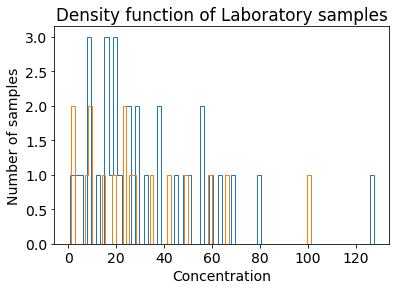

In [10]:
plt.hist(stats_train['(NH4)SO4'], bins=70, histtype='step')
plt.hist(stats_test['(NH4)SO4'], bins=70, histtype='step')
plt.title('Density function of Laboratory samples')
plt.ylabel('Number of samples')
plt.xlabel('Concentration')
plt.show()

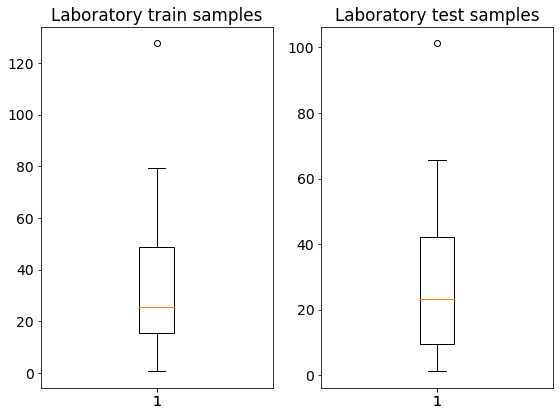

In [11]:
fig, ax = plt.subplots(1, 2, figsize= (8,6), sharex = True)

sbplt = ax[0]
sbplt.boxplot(stats_train['(NH4)SO4'])
sbplt.set_title('Laboratory train samples')
    
sbplt = ax[1]
sbplt.boxplot(stats_test['(NH4)SO4'])
sbplt.set_title('Laboratory test samples')

fig.tight_layout()

#fig.text(0.4,0, "Movie length in minutes")
#fig.text(0,0.6, "Number of movies", rotation = 90)


In [20]:
# Strip charts

import plotly.express as px

PROCESS_LAB_CONC = ROOT_FOLDER + DATA_FOLDER + "data_lab_conc_clean.csv"
file = pd.read_csv(PROCESS_LAB_CONC, index_col="Unnamed: 0")
data_lab_conc = pd.DataFrame(file)

df = px.data.tips()
fig = px.strip(data_lab_conc, x="(NH4)SO4", y="TRset")
fig.show()